In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [51]:
def histogram_stretching(image,avoid=True,percent=0.01,return_hist=True):
  #histogram is a 0-255 array presenting the number of certain brightness occurances in image
  hist = np.zeros(256,dtype=int)
  #to speed up this process and avoid multi-looping we are going to find unique vaalues of image and their counts
  uni, cnt = np.unique(image, return_counts=True)



  # and pass these information to histogram
  for i,j in zip(uni,cnt):
    hist[i]=j
  hist=hist.astype(int)



  #avoid first 1 percent ( for sparse histograms )
  if avoid:
    pers=int(percent*255)
    hist[254-pers:]=0
    hist[:pers]=0


  #find non zero elements
  firs=0
  las=255
  for i in range(256):
    if hist[i]!=0:
      firs=i
      break
  for j in range(256):
    if hist[255-j]!=0:
      las=j

  #rescale
  
  output_image=(image-firs)
  output_image=output_image/(las-firs)
  output_image=output_image*255
  output_image[output_image>255]=255
  output_image[output_image<0]=0
  
  output_image=output_image.astype(np.uint8) 

  if return_hist:
    nu_hist=(hist-firs)
    hist=hist/(las-firs)
    nu_hist=hist*255
    nu_hist[nu_hist>255]=255
    nu_hist[nu_hist<0]=0
    nu_hist=nu_hist.astype(int)
    return (output_image , nu_hist)


  return output_image

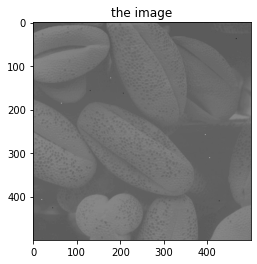

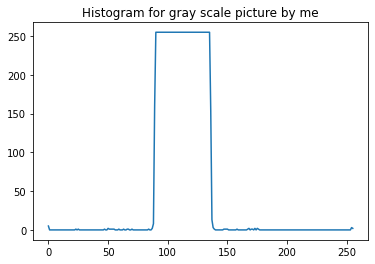

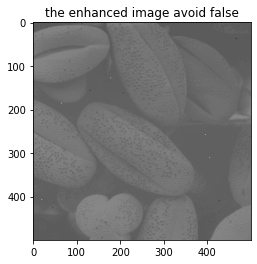

In [55]:
image=cv2.imread("img12.jpg",cv2.IMREAD_GRAYSCALE)
#everything is clear
enhanced_image, hist2=histogram_stretching(image,avoid=False)

plt.imshow(image,cmap='gray')
plt.title('the image')
plt.show()

plt.plot(hist2)
plt.title('Histogram for gray scale picture by me')
plt.show()

plt.imshow(enhanced_image,cmap='gray')
plt.title('the enhanced image avoid false')
plt.show()

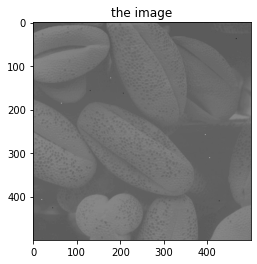

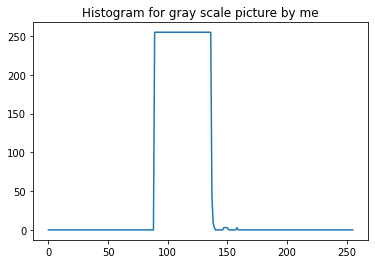

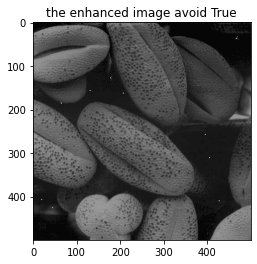

In [64]:
image=cv2.imread("img12.jpg",cv2.IMREAD_GRAYSCALE)
#everything is clear
enhanced_image, hist2=histogram_stretching(image,percent=0.35)

plt.imshow(image,cmap='gray')
plt.title('the image')
plt.show()

plt.plot(hist2)
plt.title('Histogram for gray scale picture by me')
plt.show()

plt.imshow(enhanced_image,cmap='gray')
plt.title('the enhanced image avoid True')
plt.show()